In [1]:
import numpy as np
from nozzle import Params, Nozzle, Spectral
import matplotlib.pyplot as plt
import os
import re

Text(0, 0.5, '$B$')

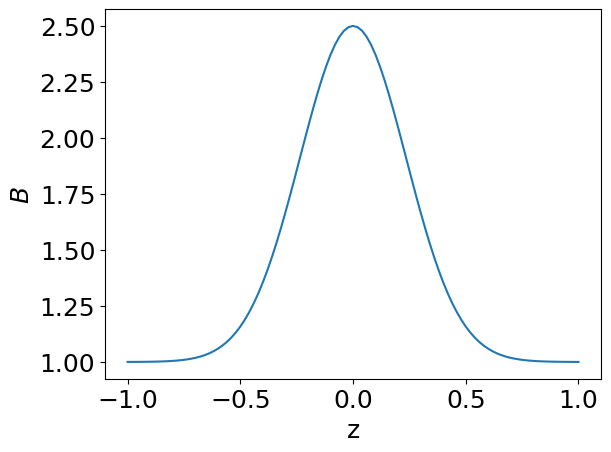

In [2]:
# magnetic field
spectral = Spectral(101, "symmetric", "FD")
params = Params(Mm=0.5, constant_v=False)
B0 = params.B0
R = params.R
Bm = params.Bm
Delta = params.Delta 

x = spectral.x
B = B0*(1+R*np.exp(-(x/Delta)**2))
plt.plot(x,B)
plt.xlabel("z")
plt.ylabel("$B$")

Text(0.5, 1.0, 'velocity profile')

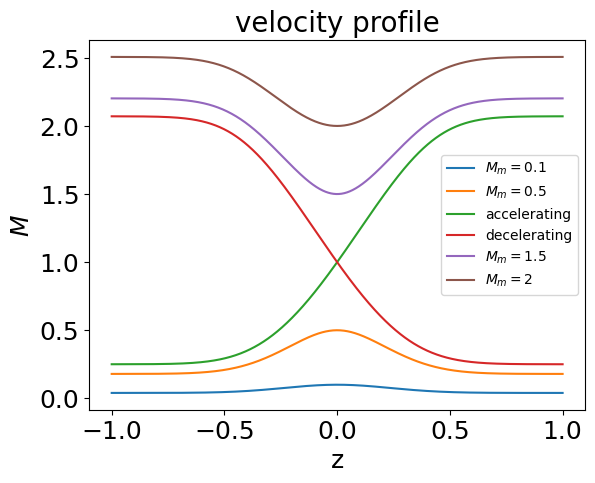

In [10]:
params_list = [
    Params(Mm=0.1, constant_v=False),
    Params(Mm=0.5, constant_v=False),
    Params(Mm=1, accelerating=True),
    Params(Mm=1, accelerating=False),
    Params(Mm=1.5, constant_v=False),
    Params(Mm=2, constant_v=False)
]
x = np.linspace(-1,1,1001)
for params in params_list:
    nozzle = Nozzle(params, x)
    if params.accelerating == True:
        label = "accelerating"
    elif params.accelerating == False:
        label = "decelerating"
    else: # paras.accelerating is None
        label = f"$M_m={params.Mm}$"
    plt.plot(x, nozzle.v0, label=label)
plt.legend(fontsize="medium")
plt.xlabel("z")
plt.ylabel("$M$")
plt.title("velocity profile")

# constant velocity

Text(0.5, 1.0, '$M_m=1.0$, Accelerating')

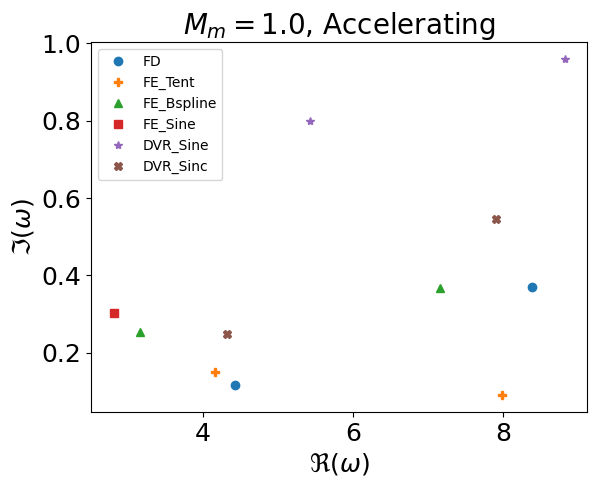

In [3]:
Mm = 1.0
constant_v = False
accelerating = False
methods = ["FD", "FE_Tent", "FE_Bspline", "FE_Sine", "DVR_Sine", "DVR_Sinc"]
marker = {
    "FD": "o",
    "FE_Tent": "P",
    "FE_Bspline": "^",
    "FE_Sine": "s",
    "DVR_Sine": "*",
    "DVR_Sinc": "X",
}

data_dir = "data"
if constant_v:
    data_dir = os.path.join(data_dir, "constant_v")
elif (Mm > 1):
    data_dir = os.path.join(data_dir, "supersonic_v")
elif (Mm < 1):
    data_dir = os.path.join(data_dir, "subsonic_v")
elif (Mm == 1):
    if accelerating:
        data_dir = os.path.join(data_dir, "accelerating_v")
    else:
        data_dir = os.path.join(data_dir, "decelerating_v")
datas = os.listdir(data_dir)

for method in methods:
    file = next(filter(lambda name: (method in name) and (f"Mm={Mm}" in name), datas))
    data = np.load(os.path.join(data_dir,file))
    x, omega, V = data["x"], data["omega"], data["V"]
    plt.plot(omega.real, omega.imag, marker[method], label=method)
plt.legend(fontsize="medium", loc="best")
plt.xlabel("$\Re(\omega)$")
plt.ylabel("$\Im(\omega)$")
plt.title(f"$M_m={Mm}$, Accelerating")

# fig, ax = plt.subplots(2,1, figsize=(10,5))
# for method in methods:
#     file = next(filter(lambda name: (method in name) and (f"Mm={Mm}" in name), datas))
#     data = np.load(os.path.join(data_dir,file))
#     x, omega, V = data["x"], data["omega"], data["V"]
#     ax[0].plot(omega.real, omega.imag, marker[method], label=method)
#     ax[0].set_xlabel("$\\Re(\omega)$")
#     ax[0].set_ylabel("$\\Im(\omega)$")

#     v = V[:,0] 
#     ax[1].plot(x, v.real/np.abs(v.real).max())
#     ax[1].set_xlabel("$z$")
#     ax[1].set_ylabel("$\\tilde{v}$")

# ax[0].set_xlim(0,5)
# ax[0].legend(fontsize="medium", loc="center left")
# # ax[1].legend(fontsize="small")
# fig.suptitle(f"$v_0=${Mm}")
# plt.tight_layout()


# subsonic case

#  supersonic case

# transonic case